In [1]:
import numpy as np
import abc
from scipy import stats
from typing import Callable, List
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
import timeit
from tqdm import tqdm

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
sns.set()

# 1\

#### i \
$p(t, x) := \mathbb{E}\left[ e^{-r(T-t)}g(S_T^{t, x}) \right]$ satisfies the following PDE from the stochastic calculus course:

$$\frac{\partial p}{\partial t} + \frac{\sigma^2 x^2}{2}\frac{\partial^2 p}{\partial x^2} + r x \frac{\partial p}{\partial x} - r p = 0 
$$
where the above functions are evaluated at $(x, t) \in \mathbb{R_+^*} \times [0, T]$.
And from the definition of $p$ follows
$$ p(T, x) = g(S_T^{T, x}) = g(x) $$ 
by the definition of $S_T^{T, x}$. Therefore
$$ p(T, S_T^{\tau, x}) = g(S_T^{\tau, x})~~~~ (*)$$ 
for any $\tau \le T$.

#### ii \
By applying Itô's formula to $u, S_u^{0, x} \mapsto e^{-ru} p(u, S_u^{0, x})$, one gets
$$\begin{align*}
\nonumber
d  \left( e^{-ru} p(u, S_u^{0, x}) \right) &= e^{-ru} \left( -r p(u, S_u^{0, x}) +  \frac{\partial p}{\partial t}(u, S_u^{0, x}) \right) du + e^{-ru} \frac{\partial p}{\partial x} (u, S_u^{0, x}) dS_u^{0, x} + \frac{1}{2} e^{-ru} \frac{\partial^2 p}{\partial x^2} d[S^{0, x}, S^{0, x}]_u \\
&= du \times e^{-ru} \underbrace{\left( \frac{\partial p}{\partial t} + \frac{\sigma^2 x^2}{2}\frac{\partial^2 p}{\partial x^2} + r x \frac{\partial p}{\partial x} - r p \right)}_{= 0}(u, S_u^{0, x}) + e^{-ru} \frac{\partial p}{\partial x} (u, S_u^{0, x}) S_u^{0, x} \sigma dW_u \\
&=  e^{-ru} \frac{\partial p}{\partial x} (u, S_u^{0, x}) S_u^{0, x} \sigma dW_u ~~~(**)
\end{align*}$$

Therefore by summing between $0$ and $T$

$$
e^{-r T} g\left(S_T^{0, x}\right) \stackrel{(*)}{=} e^{-r T} p(T, S_T^{0, x}) \stackrel{(**)}{=} p(0, x)+\int_0^T e^{-r s} \partial_x p\left(s, S_s^{0, x}\right) \sigma S_s^{0, x} \mathrm{~d} W_s
$$

# 2

 $\forall (x, t) \in \mathbb{R_+^*} \times [0, T], $ 
 
 by (**) one gets by summing between 0 and $t$
 $$ e^{-r t} p(t, S_t^{0, x}) \stackrel{(**)}{=} p(0, x)+\int_0^t e^{-r s} \partial_x p\left(s, S_s^{0, x}\right) \sigma S_s^{0, x} \mathrm{~d} W_s
 $$

and then since $p$ is assumed to be smooth, its partial derivatives such that
$$
\mathbb{E}\left[ \int_0^t \left( e^{-r s} \partial_x p\left(s, S_s^{0, x}\right) \sigma S_s^{0, x} \right)^2 \mathrm{~d} s \right] < \infty
$$

so by taking the expectation:
 $$ \mathbb{E}\left[e^{-r t} p(t, S_t^{0, x})\right] {=} ~~ p(0, x)
 $$

 which is nothing but 
 $$  p(0, x) {=}   \mathbb{E}\left[e^{-r t} p(t, x S_t^{0, 1})\right] 
 $$


let $f: t, x, y \mapsto e^{-r t} p(t, x y)$. The above can be written
 $$  p(0, x) {=}  \mathbb{E}\left[f(t, x, S_t^{0, 1})\right] 
 $$

 hence
  $$  \frac{\partial }{\partial x}p(0, x) {=}  \frac{\partial }{\partial x} \mathbb{E}\left[f(t, x, S_t^{0, 1})\right] 
 $$
 
  Since $p$ is smooth enough one can assume that the partial derivatives of f exist and are smaller in absolute value than an integrable function, allowing one to use dominated convergence theorem
 $$  \frac{\partial }{\partial x}p(0, x)  {=}  \mathbb{E}\left[\frac{\partial f }{\partial x}(t, x, S_t^{0, 1})\right]  ~~~~ (***)
 $$


 however one has that 
 $$ \frac{\partial f }{\partial x}(t, x, y) = e^{-r t} {\partial_2 p }(t, x y) y $$

 where $\partial_2$ is the differentiation operator with respect to the second variable. By using this result in (***), one finally gets

  $$  \frac{\partial }{\partial x}p(0, x)  {=}  \mathbb{E}\left[e^{-r t} {\partial_2 p }(t, x S_t^{0, 1}) S_t^{0, 1}\right] 
 $$

 ie
   $$  \frac{\partial }{\partial x}p(0, x)  {=}  \mathbb{E}\left[e^{-r t} {\partial_2 p }(t, S_t^{0, x}) S_t^{0, 1}\right] 
 $$

# 3\
## a)

The delta is, if the value of the underlying is $x$:
$$\partial_x p(0, x)=\mathbb{E}\left[\Delta_T^x\right]$$

And $\mathbb{E}\left[\Delta_T^x\right]$ can be estimated by the Monte Carlo estimator:
$$ 
\frac{1}{M} \sum_{1 \le m \le M} g' \left(S_0 e^{(r-\frac{\sigma^2}{2})T + \sigma \sqrt{T} N_m } \right) e^{\frac{\sigma^2}{2}T + \sigma \sqrt{T} N_m }
$$ 

Or one that make use of the antithetic variables:

$$ 
\frac{1}{M} \sum_{1 \le m \le M} \frac{1}{2} \left[  g' \left(S_0 e^{(r-\frac{\sigma^2}{2})T + \sigma \sqrt{T} N_m } \right) e^{-\frac{\sigma^2}{2}T + \sigma \sqrt{T} N_m } + g' \left(S_0 e^{(r-\frac{\sigma^2}{2})T - \sigma \sqrt{T} N_m } \right) e^{-\frac{\sigma^2}{2}T - \sigma \sqrt{T} N_m }  \right]
$$ 

where $N_m$ are iid standard Gaussian random variables.

## b)
 for a call, one gets

$$ 
\frac{1}{M} \sum_{1 \le m \le M} \mathbb{1}\left(S_0 e^{(r-\frac{\sigma^2}{2})T + \sigma \sqrt{T} N_M } \ge K \right) e^{\frac{\sigma^2}{2}T + \sigma \sqrt{T} N_M }
$$ 

## c) 

Below is the implementation.

In [4]:
big_tau = [tau / 10 for tau in range(1, 11)]
s_0 = 100.
r = 0.
sigma = .5
K = 95.

dg_dx = lambda z: 1. if z > 95 else 0.

In [5]:
def delta_call(s_0: float,
                r: float,
                sigma: float,
                T: float,
                K: float):
    d_plus = (np.log(s_0 / K) + (r + (sigma**2) / 2) * T ) / (sigma * np.sqrt(T))
    return stats.norm.cdf(d_plus)

In [6]:
delta_call(s_0 = s_0, r = r, sigma = sigma, T = big_tau[-1], K = K)

0.637800803354295

In [7]:
class EstimatorMC(abc.ABC):

    num_samples_for_variance = 50

    def __init__(self, s_0: float, 
                 r: float, 
                 sigma: float, 
                 T: float, 
                 dg_dx: Callable = None):
        self.s_0 = s_0
        self.r = r
        self.sigma = sigma
        self.T = T
        self.dg_dx = dg_dx

        self.M = None
        self.realizations = []
        self.estimator = None

        # define useful constants here to speed up the computations.
        # ...
    
    def print_estimator(self):
        if not isinstance(self.realizations, np.ndarray):
            self.realizations = np.asarray(self.realizations)

        if len(self.realizations) < np.min([self.num_samples_for_variance, 1]): # else '__call__' has been previously called on a large enough sample
            raise IndexError('Not enough realizations.')

        std = np.sqrt(np.sum((self.realizations-self.estimator)**2) / (self.M - 1))
        print(f'estimate: {self.estimator} with std {std} for {self.M} iterations.')
        print(f'confidence interval at the 5 percents level: [{self.estimator} +/- {1.96 * std/sqrt(self.M)}]') 
        print(f'which is [{self.estimator - 1.96 * std/sqrt(self.M), self.estimator + 1.96 * std/sqrt(self.M)}]')
        print()
    
    @abc.abstractmethod
    def step(self, z: float): # return a term of the sum.
        pass

    @abc.abstractmethod
    def __call__(self, M: int):
        pass

In [8]:
class EstimatorDelta(EstimatorMC):

    def __init__(self, s_0: float, r: float, sigma: float, T: float, dg_dx: Callable):
        super().__init__(s_0, r, sigma, T, dg_dx)

        # define useful constants here to speed up the computations.
        self.cst_1 = self.s_0 * np.exp( (self.r - (self.sigma**2) / 2) * self.T )
        self.cst_2 = np.exp( - (self.sigma**2) / 2 * self.T )
    
    
    def step(self, z: float): # return a term of the sum.
            return self.dg_dx(self.cst_1 * np.exp(self.sigma * np.sqrt(self.T) * z)) * self.cst_2 * np.exp(self.sigma * np.sqrt(self.T) * z)
    

    def __call__(self, M: int):

        self.M = M
        N_i = stats.norm.rvs(size = M) 
        self.realizations = np.vectorize(self.step)(N_i)
        self.estimator = np.mean(self.realizations)

        return self.estimator
        

In [9]:
e_mc = EstimatorDelta(s_0 = s_0, r = r, sigma = sigma, T = big_tau[-1], dg_dx = dg_dx)

In [10]:
M = 50_000
e_mc(M)

0.6425018787278126

In [11]:
e_mc.print_estimator()

estimate: 0.6425018787278126 with std 0.7946599928803665 for 50000 iterations.
confidence interval at the 5 percents level: [0.6425018787278126 +/- 0.006965501951273593]
which is [(0.6355363767765391, 0.6494673806790862)]



In [12]:
class EstimatorDeltaAntithetic(EstimatorDelta):

    def __init__(self, s_0: float, r: float, sigma: float, T: float, dg_dx: Callable):
        super().__init__(s_0, r, sigma, T, dg_dx)
    

    def __call__(self, M: int):

        self.M = M
        N_i = stats.norm.rvs(size = M)
        self.realizations = np.vectorize(self.step)(N_i)
        self.realizations_anti = np.vectorize(self.step)(-N_i)
        self.realizations = (self.realizations + self.realizations_anti)/2
        self.estimator = np.mean(self.realizations)

        return self.estimator
        

In [13]:
e_mc_anti = EstimatorDeltaAntithetic(s_0 = s_0, r = r, sigma = sigma, T = big_tau[-1], dg_dx = dg_dx)

In [14]:
M = 50_000
e_mc_anti(M)

0.6381577199339908

In [15]:
e_mc_anti.print_estimator()

estimate: 0.6381577199339908 with std 0.328248945459239 for 50000 iterations.
confidence interval at the 5 percents level: [0.6381577199339908 +/- 0.002877228865910759]
which is [(0.63528049106808, 0.6410349487999016)]



Given the error is lower than 10e-2, the 2 first decimals are correct, which can be verified with the true value of the delta under the Black-Scholes model from the analytic formula above: 0.637800803354295 .

### using a lazy api 

we can try to make an algorithm that uses tensorflow to use its lazy mode with the '@tf.function' decorator to speed up the calculations. It helped a lot since my laptop is not powerful at all.

In [17]:
import tensorflow as tf

2023-04-19 10:15:45.740787: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-19 10:15:45.819528: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-19 10:15:45.820205: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-19 10:15:47.328738: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [18]:
@tf.function
def dg_dx_tf(z):
    return tf.where(z>=tf.constant(K, dtype=tf.float32), tf.constant(1., dtype=tf.float32), tf.constant(0., dtype=tf.float32))

In [19]:
class EstimatorDeltaAntitheticTF(EstimatorMC):

    def __init__(self, s_0: float, r: float, sigma: float, T: float, dg_dx: Callable):
        super().__init__(s_0, r, sigma, T, dg_dx)

        # temporarily set M to 1.
        self.M = 1

        # define useful constants here to speed up the computations.
        self.cst_1 = self.s_0 * tf.math.exp( (self.r - (self.sigma**2) / 2) * self.T )
        self.cst_2 = tf.math.exp( - (self.sigma**2) / 2 * self.T )
    
    
    @tf.function
    def step(self, z: float): # return a term of the sum.
            return self.dg_dx(self.cst_1 * tf.math.exp(self.sigma * np.sqrt(self.T) * z)) * self.cst_2 * tf.math.exp(self.sigma * tf.math.sqrt(self.T) * z)
    
    
    @tf.function
    def __call__(self, M: int):

        self.M = M
        N_i = tf.random.normal([M]) 
        self.realizations = self.step(N_i)
        self.realizations_anti = self.step(-N_i)
        self.realizations = (self.realizations + self.realizations_anti)/2
        self.estimator = tf.math.reduce_mean(self.realizations)

        self.std = tf.math.sqrt(tf.reduce_sum((self.realizations-self.estimator)**2) / tf.constant(M - 1, dtype = tf.float32))

        return self.estimator, self.std

In [20]:
def print_estimator(estimator, std, M):

    print(f'estimate: {estimator} with std {std} for {M} iterations.')
    print(f'confidence interval at the 5 percents level: [{estimator} +/- {1.96 * std/sqrt(M)}]')
    print(f'which is [{(estimator - 1.96 * std/sqrt(M)).numpy(), (estimator + 1.96 * std/sqrt(M)).numpy()}]')
    print()

In [21]:
e_mc_anti_tf = EstimatorDeltaAntitheticTF(s_0 = tf.constant(s_0, dtype=tf.float32), 
                                            r = tf.constant(r, dtype=tf.float32), 
                                            sigma = tf.constant(sigma, dtype=tf.float32), 
                                            T = tf.constant(big_tau[-1], dtype=tf.float32), 
                                            dg_dx = dg_dx_tf)

Let's check the time it takes to run in eager mode vs lazy mode.

In [22]:
class CodeTimer:
    def __init__(self, name=None, num_iter =None):
        self.name = " '"  + name + "'" if name else ''
        self.num_iter = num_iter

    def __enter__(self):
        self.start = timeit.default_timer()

    def __exit__(self, exc_type, exc_value, traceback):
        num_iter = float(self.num_iter) if self.num_iter is not None else 1.
        self.took = (timeit.default_timer() - self.start) * 1000.0 / num_iter
        print('Code block' + self.name + ' took: ' + str(self.took) + ' ms')

In [23]:
num_iter = 5
M = 1_000_000

In eager mode with 50_000 simulations:

In [24]:
with CodeTimer('Monte carlo delta in eager mode', num_iter):
   for _ in tqdm(range(num_iter)):
      e_mc_anti(50_000)

100%|██████████| 5/5 [00:03<00:00,  1.28it/s]

Code block 'Monte carlo delta in eager mode' took: 781.1564082003315 ms


In lazy mode with a million:

In [25]:
with CodeTimer('Monte carlo delta in lazy mode', num_iter):
   for _ in range(num_iter):
      estimator, std = e_mc_anti_tf(M)

Code block 'Monte carlo delta in lazy mode' took: 205.68849979972583 ms


In [26]:
print_estimator(estimator, std, M)

estimate: 0.638001024723053 with std 0.3296380043029785 for 1000000 iterations.
confidence interval at the 5 percents level: [0.638001024723053 +/- 0.0006460904842242599]
which is [(0.6373549, 0.63864714)]



## d)  

In [27]:
M = 5_000_000

In [28]:
estimators = []
stds = []

for tau in big_tau:
    e_mc_anti_tf = EstimatorDeltaAntitheticTF(s_0 = tf.constant(s_0, dtype=tf.float32), 
                                            r = tf.constant(r, dtype=tf.float32), 
                                            sigma = tf.constant(sigma, dtype=tf.float32), 
                                            T = tf.constant(tau, dtype=tf.float32), 
                                            dg_dx = dg_dx_tf)
    estimator, std = e_mc_anti_tf(M)
    estimators.append(estimator)
    stds.append(std)

In [29]:
def plot_fn(x_i: List[float], y_i: List[List[float]], title: str, xlabel: str, ylabel: str, y_min: float = None, y_max: float = None, legend: List[str] = None) -> None:
    fig, ax = plt.subplots()
    for courbe in y_i:
        ax.plot(x_i, 
                courbe)
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_ylim(bottom = y_min, top = y_max)
    ax.set_xlabel(xlabel)
    ax.set_xlabel(xlabel)
    ax.xaxis.set_tick_params(rotation=45)
    ax.grid(True)
    if legend is not None:
        ax.legend(legend)

Here are the estimators:

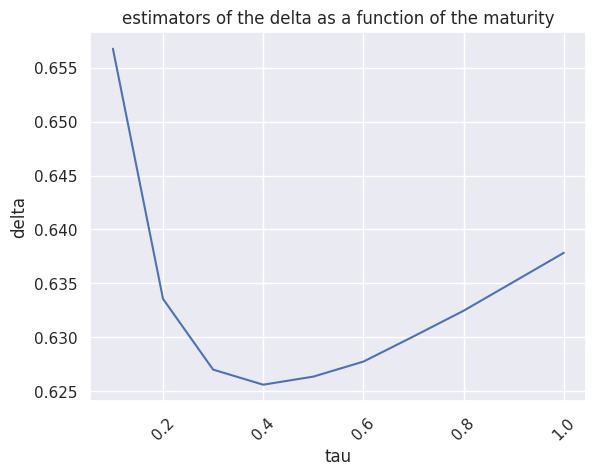

In [30]:
plot_fn(big_tau, [estimators], 'estimators of the delta as a function of the maturity', 'tau', 'delta')

And the variances:

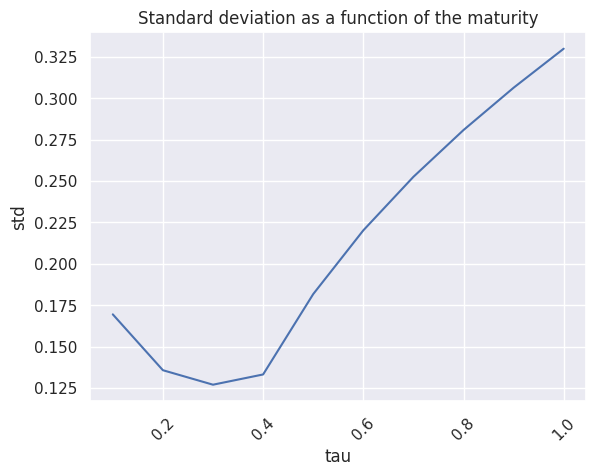

In [31]:
plot_fn(big_tau, [stds], 'Standard deviation as a function of the maturity', 'tau', 'std')

All of the estimators and their confidence bounds are plotted at the end of the notebook.

# 4
## a )

By using the result of question 1, one gets:

$$\begin{align*}
\mathbb{E} \left[ e^{-rT} g\left( S_T^{0,x} \right) \frac{W_T}{x \sigma} \right] &= \mathbb{E} \left[ \left( p(0, x)+\int_0^T e^{-r s} \partial_x p\left(s, S_s^{0, x}\right) \sigma S_s^{0, x} \mathrm{~d} W_s \right) \frac{W_T}{x \sigma} \right] \\
&= \underbrace{p(0, x) \mathbb{E} \left[ \frac{W_T}{x \sigma} \right]}_{ = 0} +  \mathbb{E} \left[ \left( \int_0^T e^{-r s} \partial_x p\left(s, S_s^{0, x}\right) \frac{x \sigma}{x \sigma} S_s^{0, 1}  \mathrm{~d} W_s \right) \int_0^T \mathrm{~d} W_s \right] \\

&\stackrel{\text{Itô's isometry}}{=} \mathbb{E} \left[ \left( \int_0^T e^{-r s} \partial_x p\left(s, S_s^{0, x}\right)  S_s^{0, 1} \times 1 \mathrm{~d} s \right)  \right] \\
&= \mathbb{E} \left[ \int_0^T e^{-r s} \partial_x p\left(s, S_s^{0, x}\right)  S_s^{0, 1}  \mathrm{~d} s  \right] \\
\end{align*}$$

## b)

By Fubini, applied to p assumed smooth enough:

$$ \begin{align*}
\mathbb{E} \left[ H_T^x \right] &= \frac{1}{T}  \mathbb{E} \left[ e^{-rT} g\left( S_T^{0,x} \right) \frac{W_T}{x \sigma} \right] \\
&\stackrel{\text{4) a)}}{=} \frac{1}{T} \mathbb{E} \left[ \int_0^T e^{-r s} \partial_x p\left(s, S_s^{0, x}\right)  S_s^{0, 1}  \mathrm{~d} s  \right] \\
&\stackrel{Fubini}{=} \frac{1}{T} \int_0^T \mathbb{E} \left[  e^{-r s} \partial_x p\left(s, S_s^{0, x}\right)  S_s^{0, 1} \right] \mathrm{~d} s   \\
&\stackrel{2)}{=} \frac{1}{T} \int_0^T \partial_x p(0, x) \mathrm{~d} s  \\
&= \frac{1}{T}  \partial_x p(0, x) \int_0^T  \mathrm{~d} s  \\
&=  \partial_x p(0, x)  \\
\end{align*}$$ 

# 5 
## a) 
Using (0.10), one can use the following Monte-Carlo estimator

$$ 
\frac{e^{-rT}}{M S_0 \sigma \sqrt{T}} \sum_{1 \le m \le M} g \left(S_0 e^{(r-\frac{\sigma^2}{2})T + \sigma \sqrt{T} N_m } \right) N_m
$$ 

Or one that make use of the antithetic variables:

$$ 
\frac{e^{-rT}}{ 2 M S_0 \sigma \sqrt{T}} \sum_{1 \le m \le M} \left[  g \left(S_0 e^{(r-\frac{\sigma^2}{2})T + \sigma \sqrt{T} N_m } \right) - g \left(S_0 e^{(r-\frac{\sigma^2}{2})T - \sigma \sqrt{T} N_m } \right) \right] N_m
$$ 

With the speed up provided by tensorflow one gets:

In [32]:
@tf.function
def g_fn(z):
    return tf.where(z>=tf.constant(K, dtype=tf.float32), z-K, tf.constant(0., dtype=tf.float32))

In [33]:
class EstimatorDeltaAntitheticTF_2(EstimatorMC):

    def __init__(self, s_0: float, r: float, sigma: float, T: float, g_fn: Callable):
        super().__init__(s_0, r, sigma, T)

        self.g_fn = g_fn
        
        # temporarily set M to 1.
        self.M = 1

        # define useful constants here to speed up the computations.
        self.cst_1 = self.s_0 * tf.math.exp( (self.r - (self.sigma**2) / 2) * self.T )
        self.cst_2 = tf.math.exp(-r * T) / (s_0 * sigma * tf.math.sqrt(T))
    
    
    @tf.function
    def step(self, z: float): # return a term of the sum.
            return  self.cst_2 * self.g_fn(self.cst_1 * tf.math.exp(self.sigma * np.sqrt(self.T) * z)) * z
    
    
    @tf.function
    def __call__(self, M: int):

        self.M = M
        N_i = tf.random.normal([M])
        self.realizations = self.step(N_i)
        self.realizations_anti = self.step(-N_i)
        self.realizations = (self.realizations + self.realizations_anti)/2
        self.estimator = tf.math.reduce_mean(self.realizations)

        self.std = tf.math.sqrt(tf.reduce_sum((self.realizations-self.estimator)**2) / tf.constant(M - 1, dtype = tf.float32))

        return self.estimator, self.std

In [34]:
e_mc_anti_tf_2 = EstimatorDeltaAntitheticTF_2(s_0 = tf.constant(s_0, dtype=tf.float32), 
                                            r = tf.constant(r, dtype=tf.float32), 
                                            sigma = tf.constant(sigma, dtype=tf.float32), 
                                            T = tf.constant(big_tau[-1], dtype=tf.float32), 
                                            g_fn = g_fn)

In [35]:
num_iter = 5
M = 1_000_000

In [36]:
with CodeTimer('Monte carlo delta in lazy mode', num_iter):
   for _ in range(num_iter):
      estimator, std = e_mc_anti_tf_2(M)

Code block 'Monte carlo delta in lazy mode' took: 105.11086100013927 ms


One does not have to divide by 2*M for the antithetic varaible convention we have taken. The variance reduction is already taken into account in the standard deviation given how we implemented it.

In [37]:
print_estimator(estimator, std, M)

estimate: 0.6382988095283508 with std 1.2155356407165527 for 1000000 iterations.
confidence interval at the 5 percents level: [0.6382988095283508 +/- 0.0023824498057365417]
which is [(0.63591635, 0.64068127)]



In [38]:
M = 5_000_000

In [39]:
estimators_2 = []
stds_2 = []

for tau in big_tau:
    e_mc_anti_tf_2 = EstimatorDeltaAntitheticTF_2(s_0 = tf.constant(s_0, dtype=tf.float32), 
                                            r = tf.constant(r, dtype=tf.float32), 
                                            sigma = tf.constant(sigma, dtype=tf.float32), 
                                            T = tf.constant(tau, dtype=tf.float32), 
                                            g_fn = g_fn)
    estimator, std = e_mc_anti_tf_2(M)
    estimators_2.append(estimator)
    stds_2.append(std)

Here are the estimators:

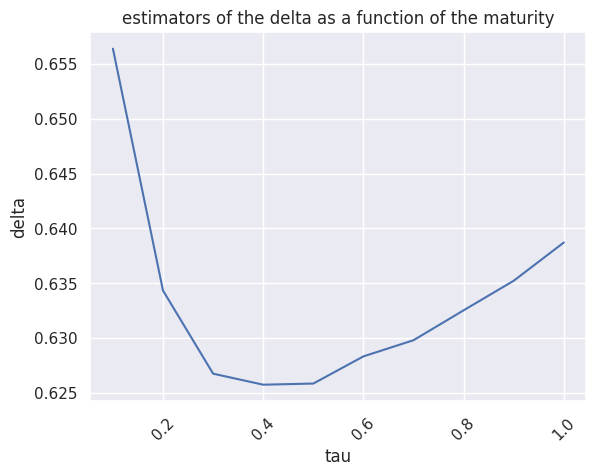

In [40]:
plot_fn(big_tau, [estimators_2], 'estimators of the delta as a function of the maturity', 'tau', 'delta')

And the variances:

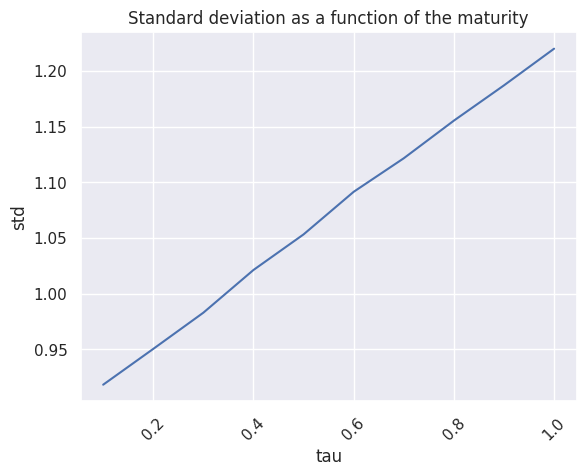

In [41]:
plot_fn(big_tau, [stds_2], 'Standard deviation as a function of the maturity', 'tau', 'std')

One do not gets the same variance curve (as a function of the maturity) for the two estimators.

## c)

A new Monte Carlo estimator can be (using the provided covariate):

$$ 
\frac{e^{-rT}}{M S_0 \sigma \sqrt{T}} \sum_{1 \le m \le M} \left( g \left(S_0 e^{(r-\frac{\sigma^2}{2})T + \sigma \sqrt{T} N_m } \right) - g \left( S_0  \right) \right) N_m
$$ 

The antitetic one being the same as that of 5) a).

In [42]:
class EstimatorDeltaTF_3(EstimatorMC):

    def __init__(self, s_0: float, r: float, sigma: float, T: float, g_fn: Callable):
        super().__init__(s_0, r, sigma, T)

        self.g_fn = g_fn

        # temporarily set M to 1.
        self.M = 1

        # define useful constants here to speed up the computations.
        self.cst_1 = self.s_0 * tf.math.exp( (self.r - (self.sigma**2) / 2) * self.T )
        self.cst_2 = tf.math.exp(-r * T) / (s_0 * sigma * tf.math.sqrt(T))
    
    
    @tf.function
    def step(self, z: float): # return a term of the sum.
            return  self.cst_2 * (self.g_fn(self.cst_1 * tf.math.exp(self.sigma * np.sqrt(self.T) * z)) - self.g_fn(self.s_0)) * z
    
    
    @tf.function
    def __call__(self, M: int):

        self.M = M
        N_i = tf.random.normal([M])
        self.realizations = self.step(N_i)
        self.estimator = tf.math.reduce_mean(self.realizations)

        self.std = tf.math.sqrt(tf.reduce_sum((self.realizations-self.estimator)**2) / tf.constant(M - 1, dtype = tf.float32))

        return self.estimator, self.std

In [43]:
e_mc_anti_tf_3 = EstimatorDeltaTF_3(s_0 = tf.constant(s_0, dtype=tf.float32), 
                                            r = tf.constant(r, dtype=tf.float32), 
                                            sigma = tf.constant(sigma, dtype=tf.float32), 
                                            T = tf.constant(big_tau[-1], dtype=tf.float32), 
                                            g_fn = g_fn)

In [44]:
num_iter = 5
M = 1_000_000

In [45]:
with CodeTimer('Monte carlo delta in lazy mode', num_iter):
   for _ in range(num_iter):
      estimator, std = e_mc_anti_tf_3(M)

Code block 'Monte carlo delta in lazy mode' took: 85.41092400046182 ms


In [46]:
print_estimator(estimator, std, M)

estimate: 0.6369180083274841 with std 1.770517349243164 for 1000000 iterations.
confidence interval at the 5 percents level: [0.6369180083274841 +/- 0.003470214083790779]
which is [(0.63344777, 0.64038825)]



In [47]:
M = 5_000_000

In [48]:
estimators_3 = []
stds_3 = []

for tau in big_tau:
    e_mc_anti_tf_3 = EstimatorDeltaTF_3(s_0 = tf.constant(s_0, dtype=tf.float32), 
                                            r = tf.constant(r, dtype=tf.float32), 
                                            sigma = tf.constant(sigma, dtype=tf.float32), 
                                            T = tf.constant(tau, dtype=tf.float32), 
                                            g_fn = g_fn)
    estimator, std = e_mc_anti_tf_3(M)
    estimators_3.append(estimator)
    stds_3.append(std)

Here are the estimators:

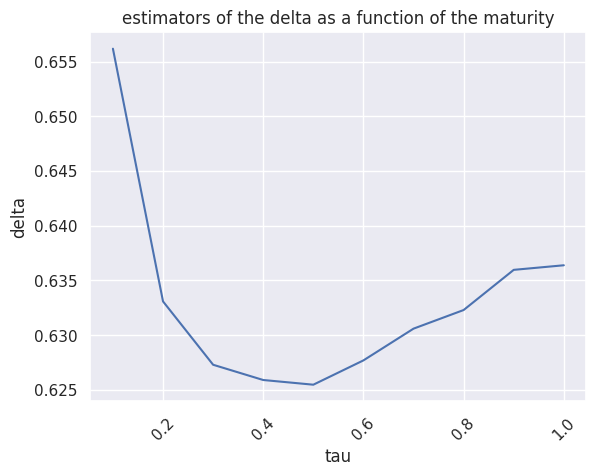

In [49]:
plot_fn(big_tau, [estimators_3], 'estimators of the delta as a function of the maturity', 'tau', 'delta')

And the variances:

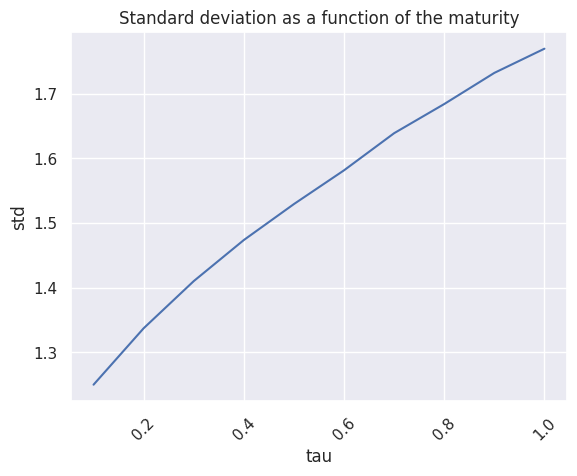

In [50]:
plot_fn(big_tau, [stds_3], 'Standard deviation as a function of the maturity', 'tau', 'std')

As one can see, the variance is getting worse. The best variance was obtained for the anthitetic first estimator of 3)c). Then goes that of the antithetic one of 5)a). And finally 5)c). 

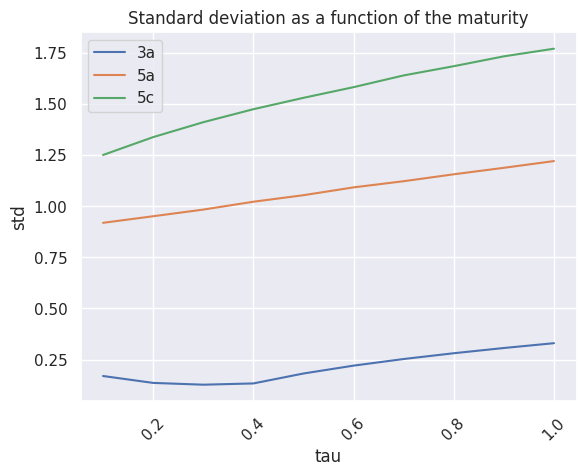

In [51]:
plot_fn(big_tau, 
        [stds, stds_2, stds_3], 
        'Standard deviation as a function of the maturity', 
        'tau', 
        'std', 
        legend = ['3a', '5a', '5c'])

In [52]:
def plot_mutli_curves(x_i: List[float], 
                      y_true: List[float], 
                      y_i: List[List[float]], 
                      stds_i: List[List[float]], 
                      colors_i: List[str], 
                      M: float, 
                      title: str, 
                      xlabel: str, 
                      ylabel: str, 
                      y_min: float = None, 
                      y_max: float = None, 
                      legend: List[str] = None) -> None:
    
    fig, ax = plt.subplots()
    for courbe, stds, col in zip(y_i, stds_i, colors_i):
        ax.plot(x_i, 
                courbe,
                color = col, 
                linewidth=2, 
                markersize=12)
        ax.fill_between(x_i, np.array(courbe)-np.array(stds) / np.sqrt(M), np.array(courbe) + np.array(stds) / np.sqrt(M), color='b', alpha=.1)
    ax.plot(x_i, 
                y_true,
                color = 'r', 
                linewidth=2, 
                markersize=12,
                 linestyle='dashed', )
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_ylim(bottom = y_min, top = y_max)
    ax.set_xlabel(xlabel)
    ax.set_xlabel(xlabel)
    ax.xaxis.set_tick_params(rotation=45)
    ax.grid(True)
    if legend is not None:
        ax.legend(legend)

Apologies for the plot below where the legend is wrong. But still one can deduce which line is which.

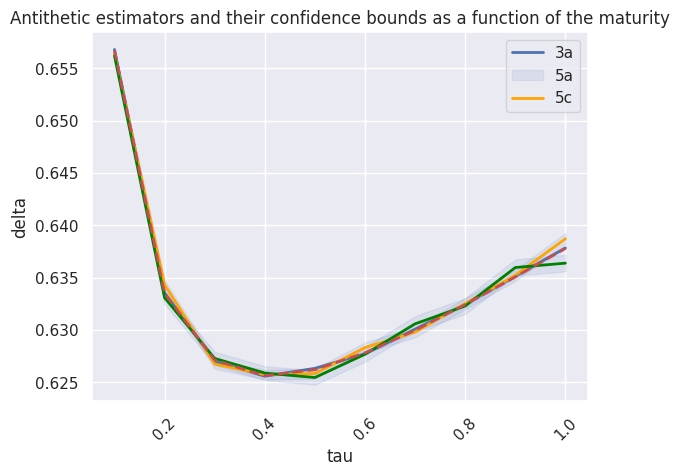

In [53]:
plot_mutli_curves(big_tau, 
                  [delta_call(s_0 = s_0, r = r, sigma = sigma, T = tau, K = K) for tau in big_tau],
                  [estimators, estimators_2, estimators_3],
                [stds, stds_2, stds_3], 
                ['b', 'orange', 'green'],
                5_000_000,
                'Antithetic estimators and their confidence bounds as a function of the maturity', 
                'tau', 
                'delta', 
                legend = ['3a', '5a', '5c'])

If one zooms in:

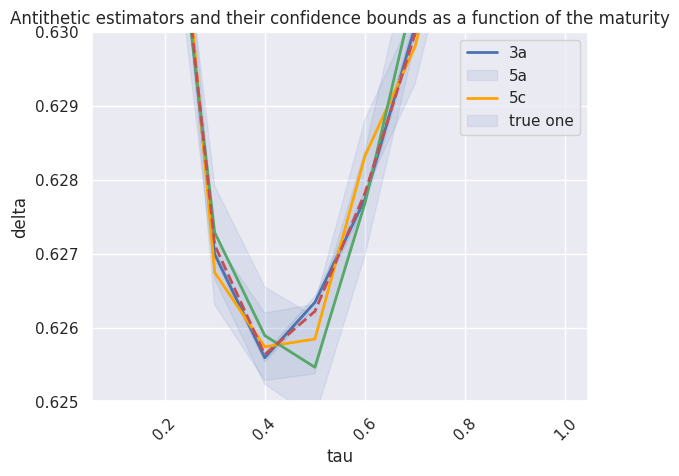

In [54]:
plot_mutli_curves(big_tau, 
                  [delta_call(s_0 = s_0, r = r, sigma = sigma, T = tau, K = K) for tau in big_tau],
                  [estimators, estimators_2, estimators_3],
                [stds, stds_2, stds_3], 
                ['b', 'orange', 'g'],
                5_000_000,
                'Antithetic estimators and their confidence bounds as a function of the maturity', 
                'tau', 
                'delta', 
                legend = ['3a', '5a', '5c', 'true one'],
                y_min = .625,
                y_max = .630)

The antithetic estimator of 5)a) seems to be the best, since it is the closest to the true one (red dashed line above).